<a href="https://colab.research.google.com/github/norgaston/laboratorio3-mlbd/blob/main/Laboratorio_3_correcci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 3 - Clasificador zonas según el peligro**

**ELEMENTOS DE APRENDIZAJE DE MÁQUINA Y BIG DATA**

Carrera:  T.U. TECNOLOGÍAS DE PROGRAMACIÓN SEDE PUNTA ALTA

Facultad: Facultad de la Micro, Pequeña y Mediana Empresa (UPSO)

Docente: Valentín Barco

Cuatrimestre/Año: 2° Cuatrimestre 2023


En el laboratorio, nos centraremos en un conjunto de datos que incluye registros de
crímenes de 1973 en distintos estados de EE. UU., así como el porcentaje de la población
que reside en zonas urbanas en esos estados. El propósito es clasificar los estados en
diferentes categorías basadas en estos factores.

### **Integrantes del Grupo 12: Dolores Ponce y Gaston Ponce**

**Trabajo corregido**
* Se considera ahora a la población urbana como una característica adicional para el entrenamiento.
* Se analiza cómo se distribuyen los valores de las distintas características en cada uno de los clusters.

## **Bibliotecas necesarias**

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

## **Carga y análisis exploratorio de los datos**

In [2]:
# Cargar el conjunto de datos
ruta = '/content/Crimenes.csv'  # Ruta desde donde voy a cargar el dataset
data = pd.read_csv(ruta, encoding='latin-1')

In [3]:
data.head()

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Estado            50 non-null     object 
 1   Asesinatos        50 non-null     float64
 2   Asaltos           50 non-null     int64  
 3   Poblacion Urbana  50 non-null     int64  
 4   Violaciones       50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
data.describe()

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
data.isnull().sum()

Estado              0
Asesinatos          0
Asaltos             0
Poblacion Urbana    0
Violaciones         0
dtype: int64

Para esta clasificación se utilizará el algoritmo K-Means, que es apropiado cuando se espera que los datos formen clústeres bien definidos y esféricos. Dado que estamos tratando de segmentar zonas según su peligrosidad, y asumimos que estas zonas pueden agruparse de manera clara en términos de crímenes (Asesinatos, Asaltos, Violaciones), K-Means resulta adecuado.


## **Búsqueda del número óptimo de clústeres**

In [7]:
# Normalizar las características
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Asesinatos', 'Asaltos', 'Violaciones', 'Poblacion Urbana']])

# Calcular la inercia para diferentes cantidades de clústeres con datos escalados
inertia_scaled = []
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=20)
    kmeans.fit(data_scaled)
    inertia_scaled.append(kmeans.inertia_)

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 20)), y=inertia_scaled, mode='lines+markers'))
fig.update_layout(title='Curva del Codo (Datos Escalados)',
                  xaxis_title='Número de Clústeres',
                  yaxis_title='Inercia')
fig.show()


Elijo crear el modelo con 3 clústeres porque se podría proporcionar una segmentación más útil para entender las diferencias en la peligrosidad entre las zonas.

## **Creación del modelo de clasificación**

In [8]:
# Elegir el número óptimo de clústeres (en este caso, 3)
num_clusters = 3

# Crear un modelo K-Means con el número óptimo de clústeres
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)

# Entrenar el modelo K-means con el número óptimo de clústeres
kmeans_optimal = KMeans(n_clusters=num_clusters, random_state=0, n_init=20)
data['Cluster'] = kmeans_optimal.fit_predict(data_scaled)


## **Gráficos de los resultados**

In [9]:
# Contar la cantidad de estados en cada cluster
cluster_counts = data['Cluster'].value_counts().sort_index()

# Crear un gráfico de barras con Plotly Graph Objects
fig = go.Figure()

# Color único para todas las barras
bar_color = '#66c2a5'  # Verde-cyan

# Agregar una barra para cada cluster con el mismo color
for cluster, count in cluster_counts.items():
    fig.add_trace(go.Bar(x=[cluster], y=[count], marker_color=bar_color))

# Configurar el diseño del gráfico
fig.update_layout(title_text='Cantidad de Estados en Cada Cluster',
                  xaxis_title='Cluster',
                  yaxis_title='Cantidad de Estados',
                  xaxis=dict(tickvals=cluster_counts.index, ticktext=cluster_counts.index))

# Desactivar la leyenda
fig.update_layout(showlegend=False)

# Mostrar el gráfico
fig.show()


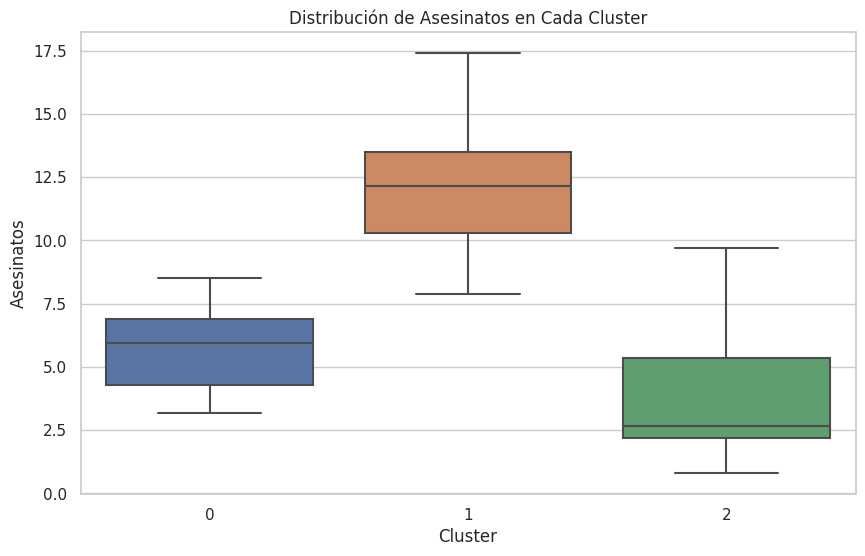

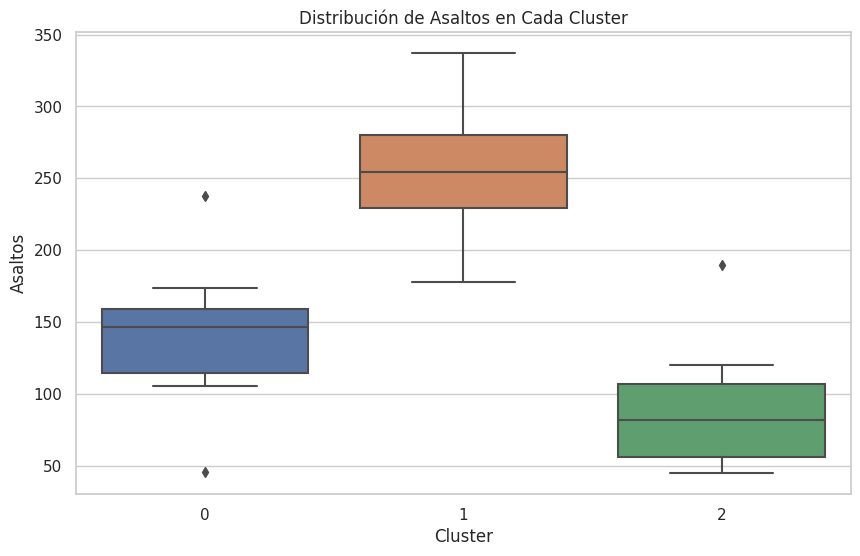

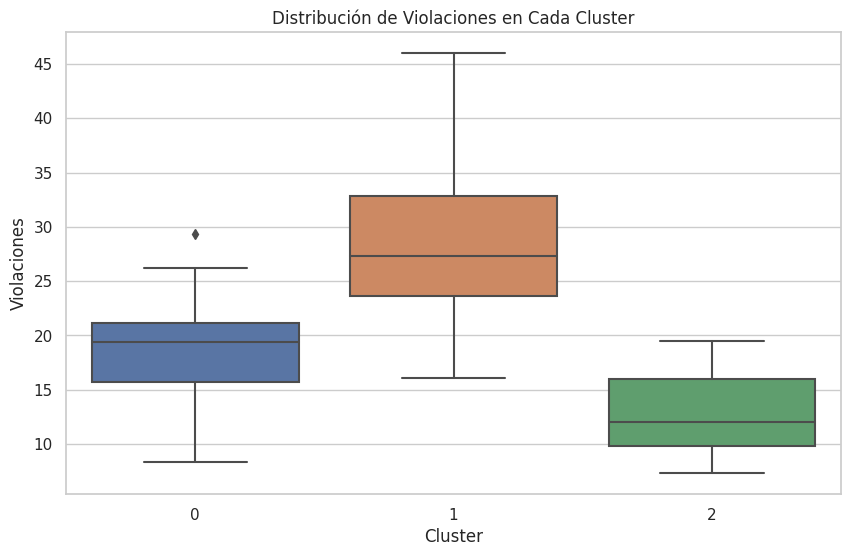

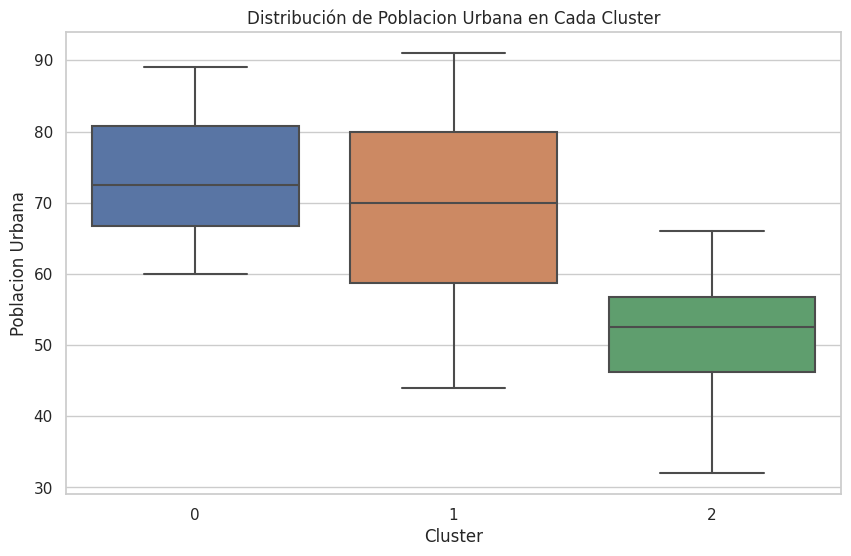

In [10]:
# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Seleccionar las características a visualizar
features_to_plot = ['Asesinatos', 'Asaltos', 'Violaciones', 'Poblacion Urbana']

# Crear subgráficos para cada característica
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=data)
    plt.title(f'Distribución de {feature} en Cada Cluster')
    plt.show()


Al analizar cómo se distribuyen los valores de las distintas características en cada uno de los clusters, podemos concluir que el cluster 2 corresponde a estados de baja peligrosidad, el cluster 0 de peligrosidad moderada y el cluster 1 de alta peligrosidad.

## **Tabla de Resultados**

In [11]:
# Ordenar el DataFrame por la columna 'Cluster'
data_sorted = data.sort_values(by='Cluster')

# Mapear los clusters a los niveles de peligro
nivel_peligro_mapping = {0: 'Medio', 1: 'Alto', 2: 'Bajo'}
data_sorted['Nivel de Peligro'] = data_sorted['Cluster'].map(nivel_peligro_mapping)

# Visualizar el DataFrame ordenado con la nueva columna
data_sorted


,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Nivel de Peligro
49,Wyoming,6.8,161,60,15.6,0,Medio
20,Massachusetts,4.4,149,85,16.3,0,Medio
34,Ohio,7.3,120,75,21.4,0,Medio
15,Kansas,6.0,115,66,18.0,0,Medio
35,Oklahoma,6.6,151,68,20.0,0,Medio
13,Indiana,7.2,113,65,21.0,0,Medio
36,Oregon,4.9,159,67,29.3,0,Medio
29,New Jersey,7.4,159,89,18.8,0,Medio
10,Hawaii,5.3,46,83,20.2,0,Medio
37,Pennsylvania,6.3,106,72,14.9,0,Medio


In [12]:
# Ordenar el DataFrame por la columna 'Cluster'
data_sorted = data.sort_values(by='Cluster')

# Mapear los clusters a los niveles de peligro
data_sorted['Nivel de Peligro'] = data_sorted['Cluster'].map(nivel_peligro_mapping)

# Seleccionar características para el gráfico tridimensional
features_3d = ['Asesinatos', 'Asaltos', 'Violaciones']

# Crear un gráfico tridimensional
fig = go.Figure()

# Definir colores para cada nivel de peligro
colors = {'Bajo': 'green', 'Medio': 'yellow', 'Alto': 'red'}

# Iterar sobre cada nivel de peligro y agregar puntos al gráfico tridimensional
for nivel_peligro in data_sorted['Nivel de Peligro'].unique():
    nivel_peligro_data = data_sorted[data_sorted['Nivel de Peligro'] == nivel_peligro]
    fig.add_trace(go.Scatter3d(
        x=nivel_peligro_data[features_3d[0]],
        y=nivel_peligro_data[features_3d[1]],
        z=nivel_peligro_data[features_3d[2]],
        mode='markers',
        marker=dict(
            size=nivel_peligro_data['Poblacion Urbana'] / 3,
            color=colors[nivel_peligro],  # Asignar el color correspondiente al nivel de peligro
            opacity=0.7,
        ),
        text=nivel_peligro_data['Estado'],
        hoverinfo='text',
        name=f'Nivel de Peligro: {nivel_peligro}'
    ))

# Configurar etiquetas y título
fig.update_layout(scene=dict(
                    xaxis_title=features_3d[0],
                    yaxis_title=features_3d[1],
                    zaxis_title=features_3d[2]),
                    title='Distribución de Características en Cada Nivel de Peligro (3D)')

# Mostrar el gráfico
fig.show()



En el gráfico tridimensional se pueden observar prácticamente todas las características, incluída la población urbana, representada por los puntos cuyo tamaño esta ligado al porcentaje de la misma.


## **Conclusiones:**

Al realizar un análisis detallado de los clusters y el nivel de peligro asignado a cada estado, se pueden extraer las siguientes conclusiones:

### **Cluster 0 - Bajo Riesgo**
Los estados en este cluster exhiben tasas de crímenes relativamente bajas y, en su mayoría, tienen poblaciones urbanas más pequeñas. Ejemplos de estos estados incluyen Vermont, Minessota, y West Virginia. Este cluster se asocia con un nivel de peligro bajo.

### **Cluster 1 - Medio Riesgo**
Este cluster comprende estados con tasas moderadas de crímenes y poblaciones urbanas variadas. Incluye estados como Utah, New Jersey, y Massachusetts. Aunque presentan niveles de crímenes más altos que el Cluster 0, no alcanzan los niveles del Cluster 2. Se clasifican como de riesgo medio.

### **Cluster 2 - Alto Riesgo**
Los estados en este cluster exhiben tasas significativamente altas de crímenes, y la mayoría tiene poblaciones urbanas considerables. Estados como New York, California, y Illinois están incluidos en este cluster, y se clasifican como de alto riesgo. Resulta interesante notar que algunos estados con población urbana relativamente baja, como Alaska y Mississipi, también están clasificados como de alto riesgo. Esto destaca que la inseguridad no es exclusiva de estados con grandes poblaciones o extensiones territoriales.



En términos generales, hay una tendencia a mayor inseguridad en estados con población urbana más grande, especialmente en el Cluster 2. Sin embargo, es importante destacar que otros factores también influyen en la clasificación de riesgo, y este análisis proporciona una visión general de la situación de seguridad en cada estado.





